## Objective for this Notebook
1. Define Several Neural Network, Criterion function, Optimizer
2. Test Uniform, Default and Xavier Initialization

## Preparation

In [1]:
# Import the libraries we need to use in this lab
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

## Neural Network Module and Training Function

In [4]:
# Define the neural network with Xavier initialization
class Net_Xavier(nn.Module):

  # Constructor
  def __init__(self, Layers):
    super(Net_Xavier, self).__init__()
    self.hidden = nn.ModuleList()

    for input_size, output_size in zip(Layers, Layers[1:]):
      linear = nn.Linear(input_size, output_size)
      torch.nn.init.xavier_uniform_(linear.weight)
      self.hidden.append(linear)

  # Prediction
  def forward(self, x):
    L = len(self.hidden)
    for (l, linear_transform) in zip(range(L), self.hidden):
      if l < L - 1:
        x = torch.tanh(linear_transform(x))
      else:
        x = linear_transform(x)
    return x


In [5]:
# Define the neural network with Uniform initialization
class Net_Uniform(nn.Module):

  # Constructor
  def __init__(self, Layers):
    super(Net_Uniform, self).__init__()
    self.hidden = nn.ModuleList()

    for input_size, output_size in zip(Layers, Layers[1:]):
      linear = nn.Linear(input_size, output_size)
      linear.weight.data.uniform_(0, 1)
      self.hidden.append(linear)

  # Prediction
  def forward(self, x):
    L = len(self.hidden)
    for (l, linear_transform) in zip(range(L), self.hidden):
      if l < L - 1:
        x = torch.tanh(linear_transform(x))
      else:
        x = linear_transform(x)
    return x

In [6]:
# Define the neural network with Default initialization
class Net(nn.Module):

  # Constructor
  def __init__(self, Layers):
    super(Net, self).__init__()
    self.hidden = nn.ModuleList()

    for input_size, output_size in zip(Layers, Layers[1:]):
      linear = nn.Linear(input_size, output_size)
      self.hidden.append(linear)

  # Prediction
  def forward(self, x):
    L = len(self.hidden)
    for l, linear_transform in zip(range(L), self.hidden):
      if l < L - 1:
        x = torch.tanh(linear_transform(x))
      else:
        x = linear_transform(x)
    return x

In [20]:
# function to Train the model
def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
  i = 0
  loss_accuracy = {'training_loss': [], 'validation_accuracy': []}

  for epoch in range(epochs):
    for i, (x, y) in enumerate(train_loader):
      optimizer.zero_grad()
      z = model(x.view(-1, 28*28))
      loss = criterion(z, y)
      loss.backward()
      optimizer.step()
      loss_accuracy['training_loss'].append(loss.data.item())

    correct = 0
    for x, y in validation_loader:
      yhat = model(x.view(-1, 28*28))
      _,label = torch.max(yhat, 1)
      correct += (label==y).sum().item()
    accuracy = 100 * (correct/len(validation_dataset))
    loss_accuracy['validation_accuracy'].append(accuracy)

  return loss_accuracy


## Make Some Data

In [9]:
# Create the train dataset
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
# Create the validation dataset
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
# Create Dataloader for both train dataset and validation dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.01MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:06<00:00, 244kB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.78MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Define Neural Network, Criterion function, Optimizer and Train the Model

In [10]:
# Define criterion function
criterion = nn.CrossEntropyLoss()

In [11]:
# Set the parameters
input_dim = 28*28
output_dim = 10
layers = [input_dim, 100, 10, 100, 10, 100,output_dim]
epochs = 15

## Test PyTorch Default Initialization, Xavier Initialization, Uniform Initialization

In [21]:
# Train the model with default initialization
model = Net(layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

In [22]:
# Train the model with Xavier initialization
model_Xavier = Net_Xavier(layers)
optimizer = torch.optim.SGD(model_Xavier.parameters(), lr=learning_rate)
training_results_Xavier = train(model_Xavier, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

In [23]:
# Train the model with Uniform initialization
model_Uniform = Net_Uniform(layers)
optimizer = torch.optim.SGD(model_Uniform.parameters(), lr=learning_rate)
training_results_Uniform = train(model_Uniform, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

## Analyse Results

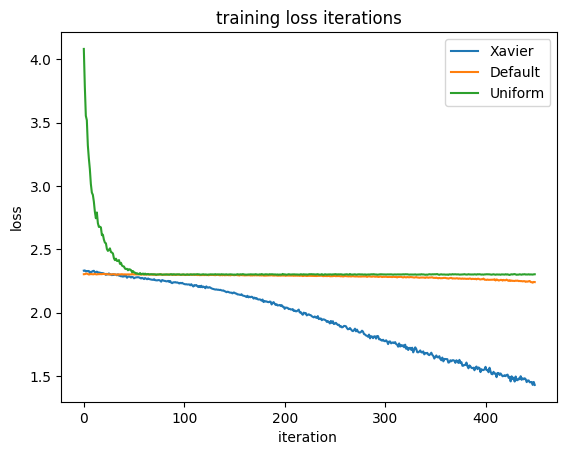

In [24]:
# Plot the loss
plt.plot(training_results_Xavier['training_loss'], label='Xavier')
plt.plot(training_results['training_loss'], label='Default')
plt.plot(training_results_Uniform['training_loss'], label='Uniform')
plt.ylabel('loss')
plt.xlabel('iteration ')
plt.title('training loss iterations')
plt.legend()

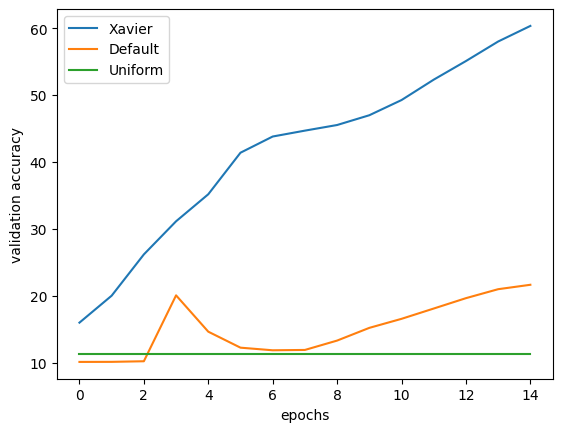

In [25]:
# Plot the accuracy
plt.plot(training_results_Xavier['validation_accuracy'], label='Xavier')
plt.plot(training_results['validation_accuracy'], label='Default')
plt.plot(training_results_Uniform['validation_accuracy'], label='Uniform')
plt.ylabel('validation accuracy')
plt.xlabel('epochs')
plt.legend()

In [26]:
print(training_results_Xavier['training_loss'])

[2.3315072059631348, 2.3331875801086426, 2.3250746726989746, 2.327876329421997, 2.328305721282959, 2.328627586364746, 2.3127243518829346, 2.3222532272338867, 2.3221275806427, 2.3282411098480225, 2.330120325088501, 2.316927194595337, 2.320427179336548, 2.3235504627227783, 2.314802885055542, 2.316955804824829, 2.3153257369995117, 2.3134758472442627, 2.3061985969543457, 2.3121819496154785, 2.3063626289367676, 2.306574821472168, 2.2978692054748535, 2.30623459815979, 2.300877332687378, 2.3096301555633545, 2.3003764152526855, 2.302121639251709, 2.2955944538116455, 2.3030471801757812, 2.297835111618042, 2.301704168319702, 2.2993879318237305, 2.294534683227539, 2.302668809890747, 2.2917532920837402, 2.290416955947876, 2.2868812084198, 2.287806749343872, 2.2836763858795166, 2.2896595001220703, 2.2855985164642334, 2.295104742050171, 2.275588035583496, 2.2836902141571045, 2.285912036895752, 2.282418727874756, 2.2771310806274414, 2.283465623855591, 2.2792773246765137, 2.271110773086548, 2.27591919

In [27]:
print(training_results_Xavier['validation_accuracy'])

[15.98, 20.01, 26.179999999999996, 31.130000000000003, 35.17, 41.38, 43.8, 44.68, 45.519999999999996, 46.98, 49.25, 52.300000000000004, 55.08, 57.99999999999999, 60.33]
